# Model Output Notebook
## Hurricane Ophelia
<img style="float:right;" src="https://id.dewberry.com/clients/Templates/DewberryLogo_RGB.png" width=150px>

### ADCIRC-SWAN Ouput
#### - Steps to follow:
  1. Import Libraries & Assign Paths
  2. Assign Tasks
  3. Save Report

### Description
Read data from ADCIRC output files and plot

---

#### - Requirements
  1. Dewberry ADCIRC Python Library (Python 3.6)
  2. ADCIRC Output Files
  
#### - Usage:
  1. Import Libraries & Assign Paths
  2. Read in data from files:
  3. Add comments/Request feedback
  4. Save Report
  
 ---

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import os
from adcirc import adcirc
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import HTML
import plotly.offline as po
from importlib import reload
import noaa_lib ; reload(noaa_lib)
from noaa_lib import *

### Assign Paths and Variables

In [2]:
qc_staff = 'Tyler Miesse'
root_dir = r'N:\TECH\COASTAL\NC_STORM_SURGE_MODELING_UPDATE\SurgeModeling\Validation\2005Ophelia\storm2'
f61 = os.path.join(root_dir,'fort.61.nc')
f62 = os.path.join(root_dir,'fort.62.nc')
f63 = os.path.join(root_dir,'fort.63.nc')
f64 = os.path.join(root_dir,'fort.64.nc')
f73 = os.path.join(root_dir,'fort.73.nc')
f74 = os.path.join(root_dir,'fort.74.nc')
max_f63 = os.path.join(root_dir,'maxele.63.nc')
max_wv63 = os.path.join(root_dir,'maxwvel.63.nc')
max_v63  = os.path.join(root_dir,'maxvel.63.nc')
minpr63  = os.path.join(root_dir,'minpr.63.nc')
hs63 =  os.path.join(root_dir,'swan_HS.63.nc')
hsmax =  os.path.join(root_dir,'swan_HS_max.63.nc')
dir63 =  os.path.join(root_dir,'swan_DIR.63.nc')
dirmax =  os.path.join(root_dir,'swan_DIR_max.63.nc')
tps63 =  os.path.join(root_dir,'swan_TPS.63.nc')
tpsmax =  os.path.join(root_dir,'swan_TPS_max.63.nc')

In [41]:
nc_file = nc4.Dataset(f63)
start,freq = '20050914 01:30:00','30min'
station,attribute,name = 0,'zeta',' Prediction'
data = nc_file['zeta'][144:,106378]
table = pd.DataFrame(data)
date  = pd.date_range(start=start,periods=int(len(table)),freq=freq)
table.insert(0,'Date Time',date)
table = table.rename(columns={0:name})

In [42]:
pred = pd.read_csv('https://tidesandcurrents.noaa.gov/api/datagetter?product=predictions&application=NOS.COOPS.TAC.WL&begin_date=20050914&end_date=20050917&datum=MSL&station=8658163&time_zone=GMT&units=metric&interval=6&format=csv')
obs  = pd.read_csv('https://tidesandcurrents.noaa.gov/api/datagetter?product=water_level&application=NOS.COOPS.TAC.WL&begin_date=20050914&end_date=20050917&datum=MSL&station=8658163&time_zone=GMT&units=metric&format=csv')

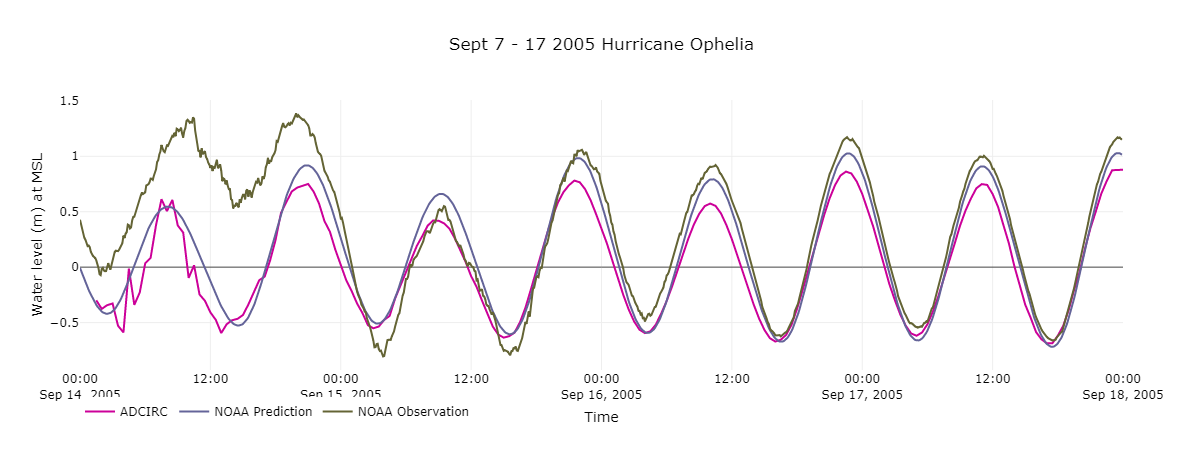

'file://Z:\\Users\\Tyler\\projects\\dewberry\\ophelia\\wrightsville_ophelia.html'

In [43]:
trace = go.Scatter(x = table['Date Time'],y = table[' Prediction'],
                name = 'ADCIRC',mode = 'lines',
                line = dict(
                    color = ('rgb(204, 0, 153)')))
trace2 = go.Scatter(x = pred['Date Time'],y = pred[' Prediction'],
                name = 'NOAA Prediction',mode = 'lines',
                line = dict(
                    color = ('rgb(100, 100, 153)')))
trace3 = go.Scatter(x = obs['Date Time'],y = obs[' Water Level'],
                name = 'NOAA Observation',mode = 'lines',
                line = dict(
                    color = ('rgb(100, 100, 53)')))
data = [trace,trace2,trace3]
layout = go.Layout(dict(title = 'Sept 7 - 17 2005 Hurricane Ophelia'),
          xaxis = dict(title = 'Time'),yaxis = dict(title = 'Water level (m) at MSL'),                     
          legend= dict(orientation = "h"),font = dict(color = 'rgb(0,0,0)'),
          paper_bgcolor = 'rgb(255,255,255)',plot_bgcolor = 'rgb(255,255,255)')
fig = go.Figure(data=data, layout=layout)
interactive = iplot(fig)
po.plot(fig,filename=root_dir+'\\'+'wrightsville_ophelia.html')

## Plot Global Outputs from the model 
*Customize Bounding boxes for each parameter as needed*


#### Water surface elevation within the study area

In [ ]:
title = 'Water Level'
lat1,lat2 = 34.4, 35.15
lon1,lon2 = -77.2, -76
file1 = nc4.Dataset(f63)
hours = 240
levels = np.arange(-2, 7.5, 0.25)
start = '2005090700'
adcirc.global_water(root_dir,file1,title,hours,levels,lon1,lon2,lat1,lat2,start)
HTML('<img width="700" height="500" src="WaterLevel.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

#### Max Water surface elevation in the study area

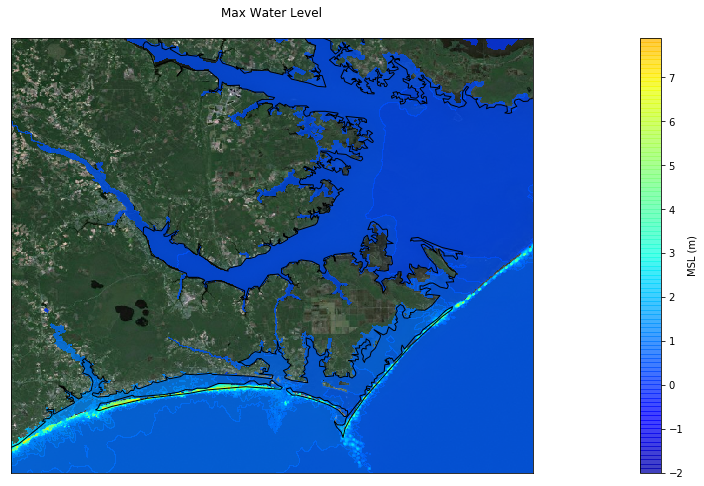

In [8]:
title = 'Max Water Level'
lat1,lat2 = 34.5, 35.5
lon1,lon2 = -77.3, -76.1
file1 = nc4.Dataset(max_f63)
levels = np.arange(-2, 8, 0.1)
fig,ax=plt.subplots(figsize=(48,8))
adcirc.max_water(root_dir,file1,ax,title,levels,lon1,lon2,lat1,lat2)

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

#### Swan Max Wave Height

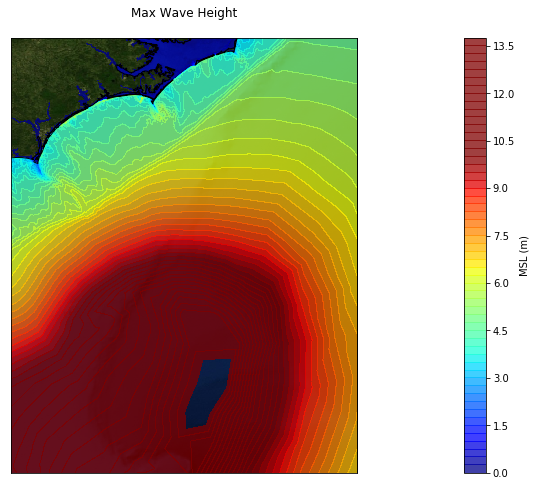

In [7]:
title = 'Max Wave Height'
lat1,lat2 = 30, 35.4
lon1,lon2 = -78.3, -74
file1 = nc4.Dataset(hsmax)
levels = np.arange(0, 14, 0.25)
fig,ax=plt.subplots(figsize=(48,8))
adcirc.swan_HSmax(root_dir,file1,ax,title,levels,lon1,lon2,lat1,lat2)

#### Depth-averaged Velocities within the study area

In [ ]:
title = 'Depth-averaged Velocity Magnitude'
lat1,lat2 = 34, 35.2
lon1,lon2 = -78, -76
file2 = nc4.Dataset(f64)
hours = 240
start = '2005090700'
levels = np.arange(-1, 6, 0.25)
adcirc.global_velocity_mag(root_dir,file2,title,hours,levels,lon1,lon2,lat1,lat2,start)
HTML('<img width="700" height="500" src="VelocityMag.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

#### Max Depth-averaged velocity in the study area

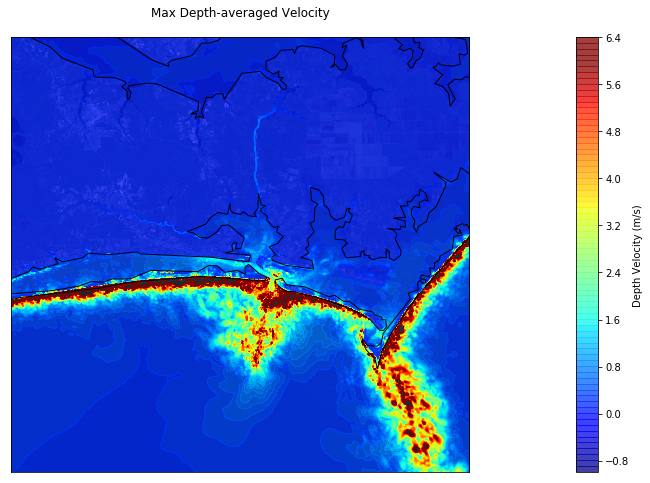

In [10]:
title = 'Max Depth-averaged Velocity'
lat1,lat2 = 34.45, 35
lon1,lon2 = -77, -76.42
file1 = nc4.Dataset(max_v63)
levels = np.arange(-1, 6.5, .1)
fig,ax=plt.subplots(figsize=(48,8))
adcirc.max_velocity(root_dir,file1,ax,title,levels,lon1,lon2,lat1,lat2)

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

#### Max Wave radiation stress in the study area

#### Atmospheric Pressure and Wind within the study area

In [ ]:
title = 'Atmoshperic Pressure and Wind'
lat1,lat2 = 34, 35.2
lon1,lon2 = -78, -76
file3 = nc4.Dataset(f73)
file4 = nc4.Dataset(f74)
hours,space = 161, 20
start = '2005082318'
levels = np.arange(8.9,10.4, 0.05)
adcirc.pressure_wind(root_dir,file3,file4,title,hours,levels,lon1,lon2,lat1,lat2,start,space)
HTML('<img width="700" height="500" src="katrina\PressureWind.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

#### Atmospheric Pressure within the study area

In [ ]:
title = 'Atmospheric Pressure'
lat1,lat2 = 34, 35.2
lon1,lon2 = -78, -76
file3 = nc4.Dataset(f73)
hours = 161
start = '2005090700'
levels = np.arange(8.9,10.4, 0.05)
adcirc.global_pressure(root_dir,file3,title,hours,levels,lon1,lon2,lat1,lat2,start)
HTML('<img width="700" height="500" src="katrina\AtmosphericPressure.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

#### Min Pressure in the study area

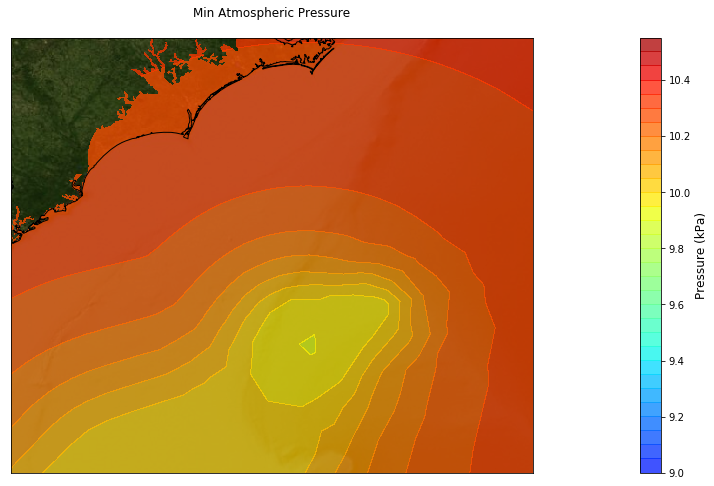

In [19]:
title = 'Min Atmospheric Pressure'
lat1,lat2 = 30, 35
lon1,lon2 = -80, -74
file1 = nc4.Dataset(minpr63)
levels = np.arange(9, 10.6, 0.05)
fig,ax=plt.subplots(figsize=(48,8))
adcirc.min_pressure(root_dir,file1,ax,title,levels,lon1,lon2,lat1,lat2)

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

#### Wind Stress or Velocity within the study area

In [ ]:
title = 'Wind Magnitude'
lat1,lat2 = 33, 35.5
lon1,lon2 = -78, -75
hours = 161
start = '2005082318'
file4 = nc4.Dataset(f74)
levels = np.arange(0, 70, 1)
adcirc.global_wind_mag(root_dir,file4,title,hours,levels,lon1,lon2,lat1,lat2,start)
HTML('<img width="700" height="500" src="WindMag.gif" frameborder="0" allowfullscreen></img>')

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

#### Max Wind Velocities within the study area

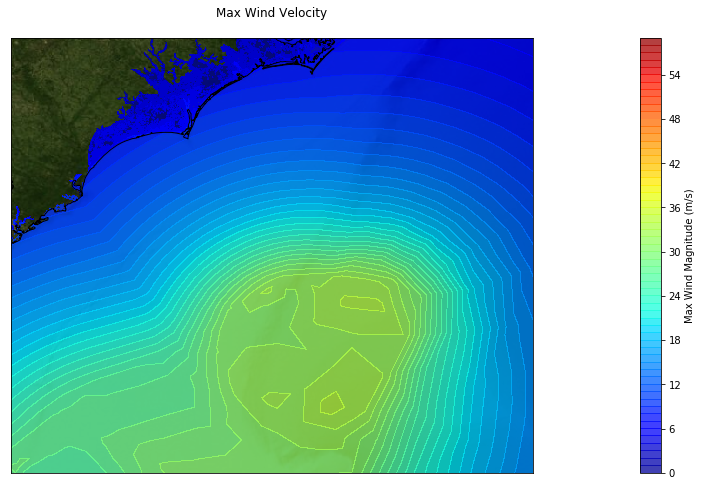

In [17]:
title = 'Max Wind Velocity'
lat1,lat2 = 30, 35
lon1,lon2 = -80, -74
file1 = nc4.Dataset(max_wv63)
levels = np.arange(0, 60, 1)
fig,ax=plt.subplots(figsize=(48,8))
adcirc.max_wind(root_dir,file1,ax,title,levels,lon1,lon2,lat1,lat2)

---
##### <font color='blue'>Comments: (date if applicable)</font> 
---

##### <font color='blue'>Response</font>
---

In [4]:
# Assign date of QC & Name/Info of QC Staff
qc_date = datetime.now()
print('Completed on {} by {}, awaiting responses'.format(qc_date, qc_staff))

Completed on 2018-08-20 10:22:23.661450 by Tyler Miesse, awaiting responses
